## COG403: Problem 1 of Problem Set 1: Neural Nets and Back Propagation

### All 3 problems for Problem Set 1 Due 4 October 2018

**Note**: To edit this notebook, click "clone", and it will prompt you to create your own copy of this library. Make sure to create a private library, so others can't see your answers. For more details, see the How-To Guide for Azure Notebooks posted on Quercus.

**Note**: For answers that require equations, please use the LaTeX syntax in markdown cells.

For information on how to use LaTeX, see:
 * https://www.sharelatex.com/learn/Mathematical_expressions
 * http://www.personal.ceu.hu/tex/cookbook.html
 
You can also look at the markdown cells with equations in this notebook for examples.

Consider the neural network in the figure below


![Alt text](https://notebooks.azure.com/juliawatson/libraries/q1-neural-net-back-propagation/raw/neural_network.png)

### (a)
Assume a logistic activation function for each unit,
$$x_{i+1} = \frac{1}{1 +e ^ {-w_ix_i}} \quad\quad (1)$$
where $w_ix_i$ is the input to unit $i + 1$. Assume connection weights of $w_1 = 5$ and $w_2 = -0.5$. What are the activations for $x_2$ and $x_3$ when $x_1 = 0$? What about when $x_1 = 1$? Show your work.

#### (a) Solution:
 
**Part (i): $x_1 = 0$**
 
 \begin{align*}
 x_2 &= \frac{1}{1 + e^{- w_1x_1}}\\
 	 &= \frac{1}{1 + e^{- (5)(0)}}\\
 x_2 &= 0.5\\
 		\\
 x_3 &= \frac{1}{1 + e^{- w_2x_2}}\\
 	 &= \frac{1}{1 + e^{- (-0.5)(0.5)}}\\
 x_3 &= 0.438
 \end{align*}

**Part (ii): $x_1 = 1$**
 
 \begin{align*}
 x_2 &= \frac{1}{1 + e^{- w_1x_1}}\\
 	&= \frac{1}{1 + e^{- (5)(1)}}\\
 x_2		&= 0.993\\
 		\\
 x_3 &= \frac{1}{1 + e^{- w_2x_2}}\\
 	&= \frac{1}{1 + e^{- (-0.5)(0.993)}}\\
 x_3		&= 0.378
 \end{align*}



### (b)
You'd like this network to learn two $(x_1, x_3)$ pairs: $(0,1)$ and $(1,0)$. The squared error on a single training example is denoted as

$$E = (\delta_{3})^2\quad\quad (2)$$

where

$$\delta_{3} = \hat{x_{3}} - x_{3} \quad\quad (3)$$

where $\hat{x_3}$ denotes the target activation for unit 3 from the training example and $x_3$ is the activation computed in part (a). To find the sum squared error on all training examples, simply compute the squared error on each training example and sum those error values. Compute the sum squared error for the network on your two training examples, given the same weights from part (a). Show your work.

#### (b) Solution


Let $\begin{pmatrix} \hat{x}_1 & \hat{x}_3  \end{pmatrix} = \begin{pmatrix} 0  &    1 \end{pmatrix}$. Then from part (a), $x_3 = 0.438$. Thus, $E = (1 - 0.438)^2 = 0.316$.
Let $\begin{pmatrix} \hat{x}_1 & \hat{x}_3  \end{pmatrix} = \begin{pmatrix} 1  &    0 \end{pmatrix}$. Then from part (a), $x_3 = 0.378$. Thus, $E = (0 - 0.378)^2 = 0.143$.

Then the sum squared error is $0.316 + 0.143 = 0.459$


### (c)

Write a function sse.m that takes in a pair of weights $(w_1, w_2)$ and returns the sum squared error for your training examples $(0,1)$ and $(1,0)$. Check that the output of your function matches the answer you computed in part (b).

In [2]:
import numpy as np


def see(w1, w2, training_examples=[(1.0, 0), (0, 1.0)]):
    """
    Returns the error of the simple neural net model (with weights w1 and w2) on the training_examples.
    """
    # Student TODO: write function body
    error = 0
    for data in training_examples:

        real_input = data[0]
        real_output = data[1]

        x2 = 1.0 / (1.0 + np.exp(- w1 * real_input))
        predicted_output = 1.0 / (1.0 + np.exp(- w2 * x2))
        error += (real_output - predicted_output) ** 2
    return error

see(5, -0.5)


0.45917404948367835

### (d)

Make a plot of the sum squared error in your network as a function of the weights. Use the product function in the itertools library to make a set of $(w_1, w_2)$ pairs where $w1$ ranges from -5 to 5 and $w_2$ ranges from -5 to 5.  Compute the sum squared error at each of these $(w_1, w_2)$ pairs using your function sse. Modify the matplotlib code to pass it the correct values to plot this error function. Based on the error values you compute, suggest a set of weights that would do better (i.e., would have a lower sum squared error) than your initial weights of $w_1 = 5$ and $w_2 = -0.5$.

Text(0.5,0,'w2 Values')

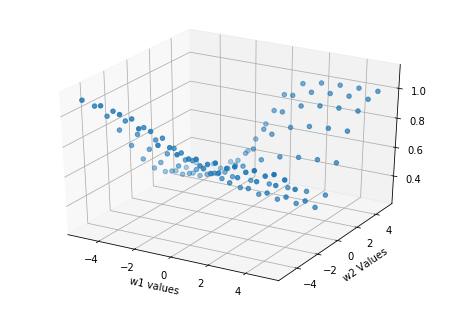

In [6]:
from itertools import product
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Student TODO: compute error for each w

w1_w2_values = []

w1_axis = []
w2_axis = []
error_axis = []

range_list = list(range(-5, 6))

for i in range_list:
    for j in range_list:
        w1_w2_values.append((i,j))
        

for weight_pair in w1_w2_values:
    w1_axis.append(weight_pair[0])
    w2_axis.append(weight_pair[1])
    
    error_axis.append(see(weight_pair[0], weight_pair[1]))
        
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(w1_axis, w2_axis, error_axis)
ax.set_xlabel('w1 values')
ax.set_ylabel('w2 Values')

Based on Figure 1, better values for $\begin{pmatrix} w_1  &    w_2 \end{pmatrix}$ would be $\begin{pmatrix} -5  &    5 \end{pmatrix}$ which results in an overall error of 0.264.

### (e)
To compute weight updates, you can use the delta rule. The delta rule uses gradient descent to find a set of weights that have a lower error than the current set of weights. You can find the general form of this update equation and its derivation in the lecture 2 slides, but for the purposes of this problem you can use the version given in Equation 4. The term $(x_{i + 1}(1 - x_{i+1}))$ is the derivative of the logistic activation function from part a.

$$\Delta w_i = \eta\delta_{i+1}(x_{i+1}(1 - x_{i+1}))x_i \quad\quad (4)$$

Assume you have just seen the training example $(0,1)$. Use Equation 4 to compute the weight update $\Delta w_2$, assuming a learning rate of $\eta = 0.1$. (You can do this by hand or use Python; if by hand, show your work, and if using Python, provide your code.)

#### (e) Solution

\begin{align*}
	\Delta w_i	&= \eta \delta_{i+1} (x_{i+1}(1- x_{i+1}))x_{i}\\
				&= \eta (\hat{x}_{i+1} - x_{i+1}) (x_{i+1}(1- x_{i+1}))x_{i}\\ 
\end{align*}

Assume you have just seen the training example $(0,1)$. Use the above equation to compute the weight update  $\Delta w_2$.
Then,

\begin{align*}
	\Delta w_2	&= \eta (\hat{x}_{3} - x_{3}) (x_{3}(1- x_{3}))x_{2}\\ 
				&= 0.1 (1 - 0.438) (0.438(1- 0.438))0.5\\
				&= 0.00692
\end{align*}


### (f)
Determining the weight update for $w_1$ is trickier, because you don't have the target activation for $x_2$. $\textit{Backpropagation of error}$ allows you to compute the error for this hidden unit as

$$\delta_2 = w_2\delta_3(x_3(1 - x_3)) \quad\quad (5)$$

This quantity can then be used in the equation in part 3 to compute the weight update for $w_1$. Compute the weight update $\Delta w_1$ for the training example $(0,1)$.

#### (f) Solution

\begin{align*}
	\Delta w_i	&= \eta \delta_{i+1} (x_{i+1}(1- x_{i+1}))x_{i}\\
				&= \eta (w_{i+1}  \delta_{i+2} (x_{i+2} (1 - x_{i+2}))) (x_{i+1}(1- x_{i+1}))x_{i}\\ 
	\Delta w_1	&= \eta (w_{2}  \delta_{3} (x_{3} (1 - x_{3}))) (x_{2}(1- x_{2}))x_{1}\\ 
				&= 0.1 (0.5 * 0.562)(0.438(1-0.438))(0.5(1-0.5))0\\\
				&= 0
\end{align*}


### (g)
Do these weight updates take you in the direction of the "optimal" weights you identified in part (d)? Explain your results in terms of your error plot from part (d) and the limitations on gradient descent learning algorithms.

For $w_2$, the weight update did take us into the optimal direction ($w_2$ becoming closer to 5), but for $w_1$, $\Delta  w_1 = 0$ taking us nowhere. This is a clear limitation. If all the inputs into the first layer are 0, then weights cannot be adjusted. Another limitaton is the learning rate. If it is too high, you will skip minimums, if it is too low, then it is going to take too long to run. In the end, the gradient descent might not converge because it is suck in a local minimum.